# ADC tests - `20180210a` test of acquisition with a AD08200 ADC pHAT

## Testing Hannes file with AD08200
 

Looks like it works in some way. But we don't see anything on the image. Perhaps something wrong with the gain setting?

this is for fast batch processing, generates images in less than a second...
We will soon have realtime imaging

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#from scipy.signal import decimate, convolve
#import math
#from scipy.interpolate import griddata
import copy
#from DAT2NPZ import *
#import glob, os

def fast_image(filename):
    Bytes = np.fromfile(filename+".dat", dtype = '<i4')
    bytes = Bytes[:-1]
    
    #ADC2_GPIO = [7, 8,9,10,11,23,24,25]
    #we want to have the bits from 7 to 8 and 23 to 25, so lets do som bit shifting magic...
    sbytes = copy.deepcopy(bytes)
    sbytes = np.right_shift(bytes,7) #so remove right bits below 7
    sbytes = np.bitwise_and(sbytes,31)

    bbytes = copy.deepcopy(bytes)
    bbytes = np.right_shift(bbytes,18) #so remove right bits below 7
    bbytes = np.bitwise_and(bbytes,511)

    mbytes = sbytes+bbytes


    #et voila
    M = mbytes

    #get sample frequency, duration and the time
    n = len(bytes)
    Duration = Bytes[-1]
    Fech = n*1.0/(Duration*1e-9)/1e6 # 1e-9 because Duration is in ns, 1e6 because Fech in Msps
    print "Duration:",Duration
    print "Fech:",Fech
    t = range(n)
    for k in range(n):
        t[k] = 1.0*t[k]/Fech
    print t[:10]

    rawSig = M
    #rawSig = M - np.average(M)
    print len(rawSig)
    
    T = t
    print T[:10]
    

    sample_size = 5000 #sample size
    repeat_size = len(rawSig)/sample_size #repeat size
    
    FH = rawSig

    #reshape envelope of the signal
    tableData = np.sqrt(np.asarray(FH).reshape((repeat_size,sample_size)))
    
    IndexEmpty = 20 #where does this number come from?
    IndexLine = 83 #where does this number come from?
    
    ExLine = tableData[IndexLine]
    ExLineRaw = tableData[IndexLine]
    plt.figure(figsize=(15,5))
    #plt.plot(T[0:4000],rawSig[5000*IndexLine:5000*IndexLine+4000],"y", label='Raw signal')
    #plt.plot(T[0:3000],F[5000*IndexLine:5000*IndexLine+3000],"r", label='Filtered signal')
    plt.plot(T[0:4000],ExLine[0:4000],"b", label='Enveloppe of the signal')
    print len(T[0:3000])
    print len(ExLine[0:3000])
    #the dimensions are not matching. guess theres something wrong with the dimensions of tableData
    plt.title("Details of a line from "+filename.split("/")[-1])
    plt.xlabel("Time in uS")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('Imgs/ProcessingLine_'+filename.split("/")[-1]+".png", bbox_inches='tight')
    plt.show()
    
    #add an offset to the image, will do that later
    #get average value
    Val = np.average(tableData)
    #tableData = np.asarray(FH).reshape((1000,2*2500))
    Offset = 0
    MinTable = 10*np.min(tableData)
    Zeroes = np.zeros((repeat_size,Offset))+Val
    BigTable = []
    BigTable = np.append(Zeroes, tableData, axis=1)
    
    #plot the reshaped data
    #there are some dots, so guess the file contains data
    plt.imshow((abs(BigTable)), aspect='auto')
    plt.title("Image of "+filename.split("/")[-1])
    plt.axhline(IndexLine, color='r', linestyle='--')
    #plt.title("Mapping the data from "+RawData.split("/")[-1]+" .")  
    plt.savefig('Imgs/map_'+filename.split("/")[-1]+".png", bbox_inches='tight')
    plt.show()
   

Duration: 1205242116
Fech: 0.829708808483
[0.0, 1.205242116, 2.4104842319999999, 3.6157263479999999, 4.8209684639999999, 6.0262105799999999, 7.2314526959999998, 8.4366948119999989, 9.6419369279999998, 10.847179043999999]
1000000
[0.0, 1.205242116, 2.4104842319999999, 3.6157263479999999, 4.8209684639999999, 6.0262105799999999, 7.2314526959999998, 8.4366948119999989, 9.6419369279999998, 10.847179043999999]
3000
3000


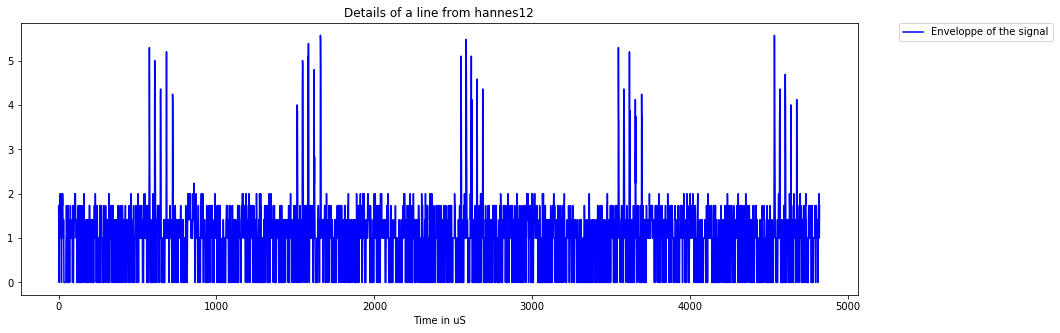

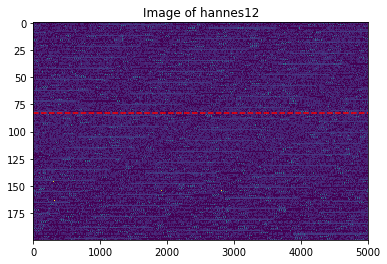

In [20]:
fast_image("hannes12")